In [23]:
#==============================================================
# File: image-segmentation-watershed.ipynb
#==============================================================
# Objective: Implementation of image segmentation via adaptive 
# thresholding.
#==============================================================
# Author: mghazel
# date: March 26, 2021
#==============================================================

In [24]:
#==============================================================
# the imports
#==============================================================
# system environment
import sys
# I/O
import os
# OpenCV
import cv2
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import argparse
import random as rng
rng.seed(12345)

# Make figures visible
%matplotlib notebook

# display used packages versions
print("Python version : {0} ".format(sys.version))
print("OpenCV version : {0} ".format(cv2.__version__))
print("Numpy version  : {0}".format(np.__version__))

Python version : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)] 
OpenCV version : 3.4.8 
Numpy version  : 1.19.2


<IPython.core.display.Javascript object>


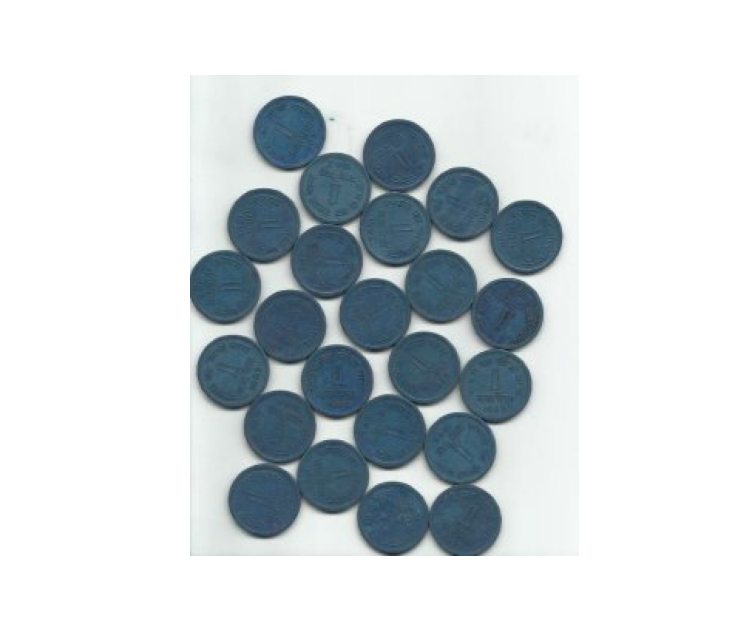

In [25]:
#==============================================================
# Step 1: Read the input image 
#==============================================================
# the image file name
#--------------------------------------------------------------
# Test-image-01: outdoor-scene test image
#--------------------------------------------------------------
# fname = os.path.join("resources","images","outdoors-scene.jpeg")
#--------------------------------------------------------------
# Test-image-02: coins test image
#--------------------------------------------------------------
fname = os.path.join("resources","images","coins.jpg")
#--------------------------------------------------------------
# Test-image-02: oranges test image
#--------------------------------------------------------------
# fname = os.path.join("resources","images","oranges.png")
#--------------------------------------------------------------
# read the input image
img = cv2.imread(fname)
# if the image is RGB then convert to grayscale
if ( len(img.shape) > 1 ):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
else: # make a copy of the image
    gray = img.copy()

#--------------------------------------------------------------
# visualize the input image
#--------------------------------------------------------------
# create the figure and set its size and title
#--------------------------------------------------------------
plt.figure("Input image", figsize=(6,5))
# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


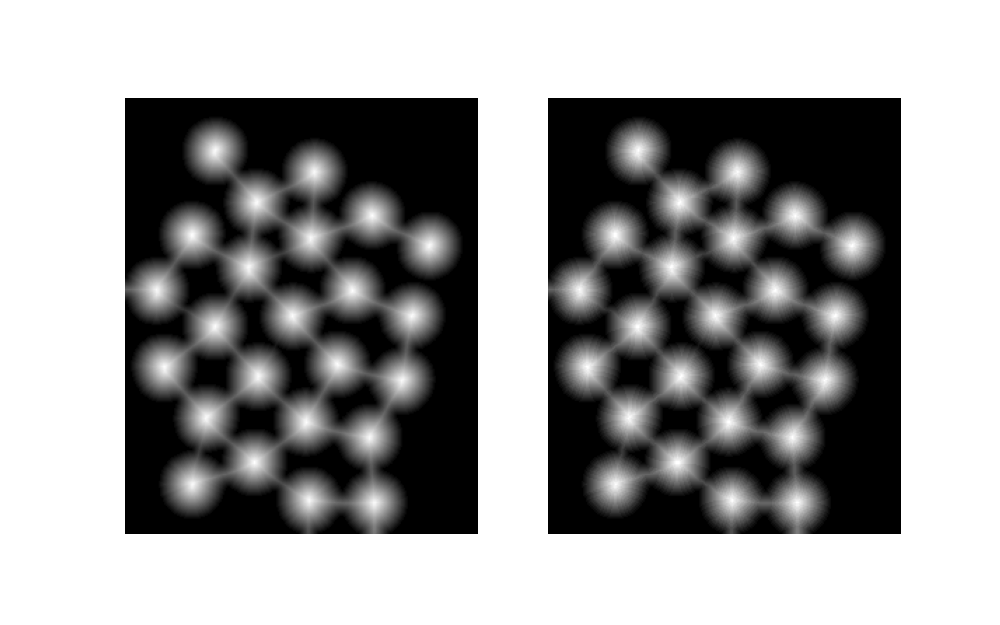

In [26]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
#=====================================================
# WITH THRESHOLDING:
#=====================================================
ret, sure_fg = cv2.threshold(dist_transform,0.70*dist_transform.max(),255,0)
# Try different factors:
# ret, sure_fg = cv2.threshold(dist_transform,0.50*dist_transform.max(),255,0)
# Try Adaptive thresholding factors:
#=====================================================
# WITHOUT THRESHOLDING:
#=====================================================
# sure_fg = dist_transform
#=====================================================
# - Yields good results for oranges and outddor scene
# - Yields poor resulst for the coins images
#=====================================================
sure_fg = dist_transform
#=====================================================
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

#--------------------------------------------------------------
# create the figure and set its size and title
#--------------------------------------------------------------
plt.figure("Thresholded Distance Transform", figsize=(8,5))
# Show the markers image
plt.subplot(121)
plt.imshow(dist_transform, cmap='gray')
plt.axis('off')
plt.show()
# Show the segmented image
plt.subplot(122)
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


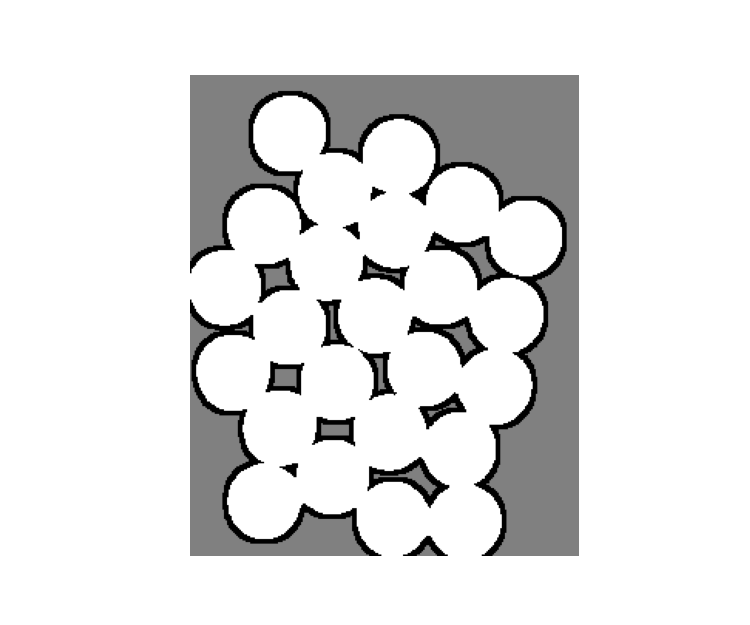

In [30]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
#--------------------------------------------------------------
# create the figure and set its size and title
#--------------------------------------------------------------
plt.figure("Markers image after labeling", figsize=(6,5))
# Show the image
plt.imshow(markers, cmap = 'gray')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


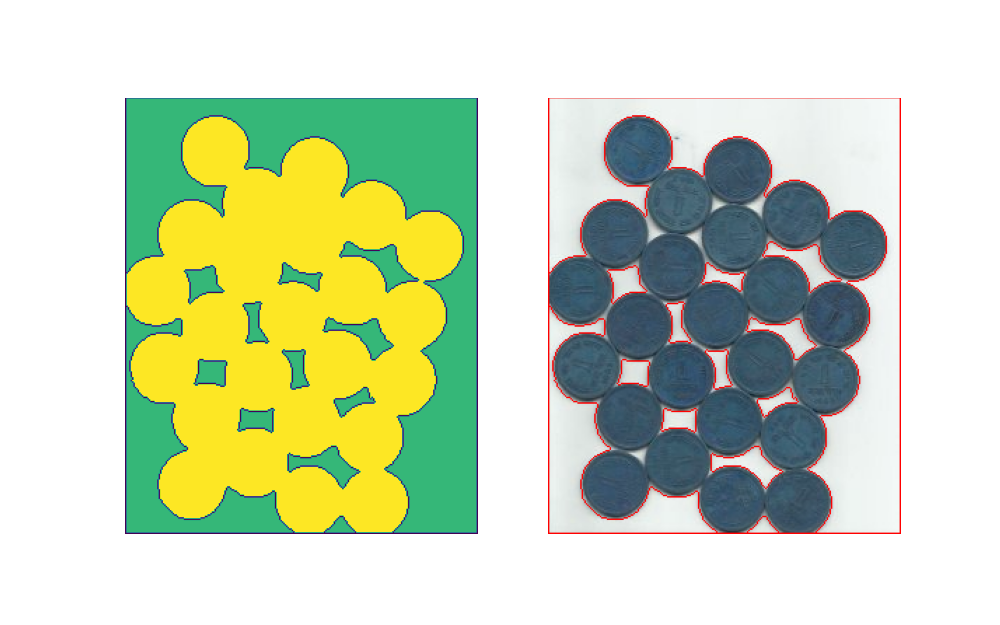

In [28]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
#--------------------------------------------------------------
# create the figure and set its size and title
#--------------------------------------------------------------
plt.figure("Segmentation results", figsize=(8,5))
# Show the markers image
plt.subplot(121)
plt.imshow(markers)
plt.axis('off')
plt.show()
# Show the segmented image
plt.subplot(122)
plt.imshow(img)
plt.axis('off')
plt.show()